**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df = pd.read_csv(r"C:\Users\pj\Downloads\Concrete Compressive Strength Prediction\Data\Raw_Data\concrete_data.csv")
df.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [3]:
df.shape

(1030, 9)

In [4]:
df.describe()

cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate           age  \
count       1030.000000       1030.000000      1030.000000  1030.000000   
mean           6.204660        972.918932       773.580485    45.662136   
std            5.973841         77.753954        80.175980    63.169912   
min            0.000000        801.000000       594.000000     1.000000   
25%            0.000000        932.000000       730.950000     7.000000   
50%            6.400000        968.000000       779.500000    28.000000   
75%           10.200000       1029.400000       824.000000    56.000000   
max           32.200000       1145.000000       992.600000   365.000000   

       concrete_compressive_strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
25%                        23.710000  
50%                        34.445000  
75%                        46.135000  
max                        82.600000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

### Heatmap

<AxesSubplot: >

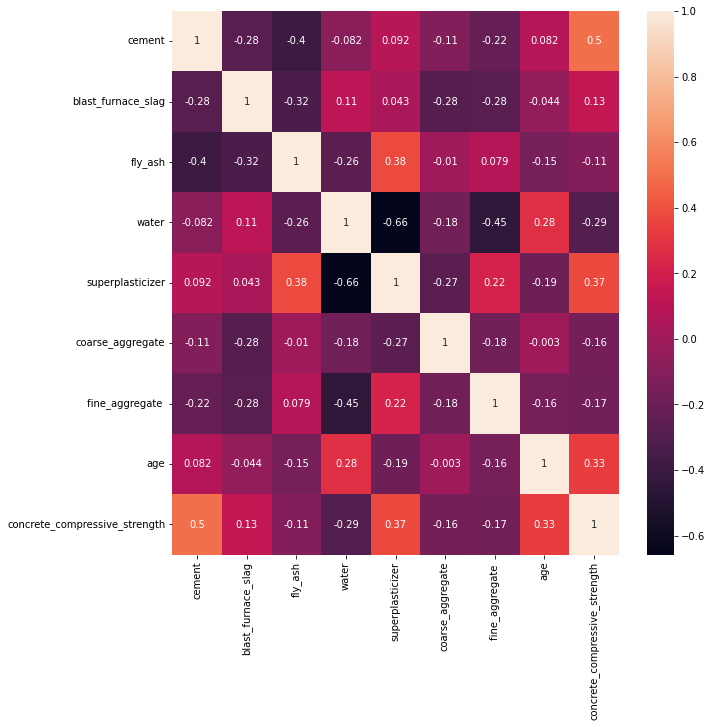

In [7]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

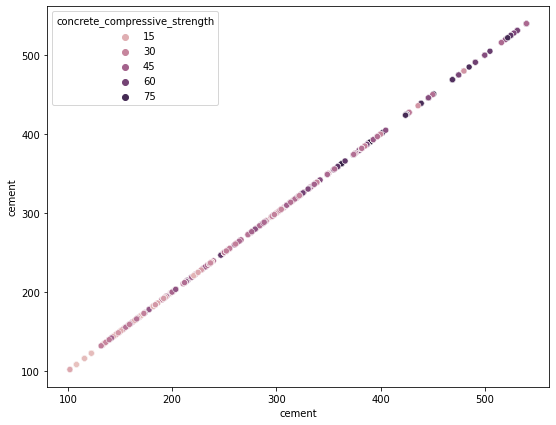

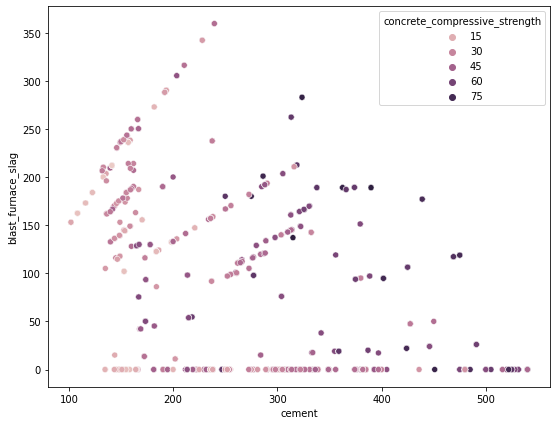

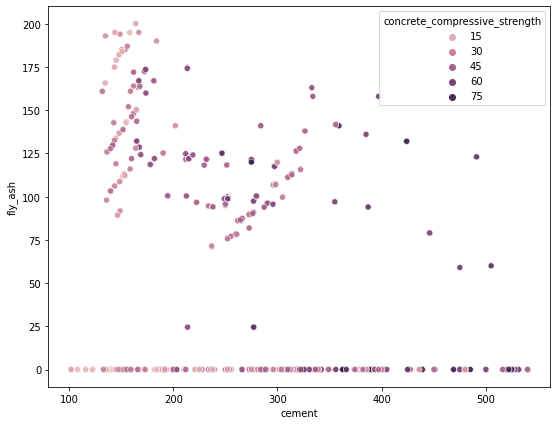

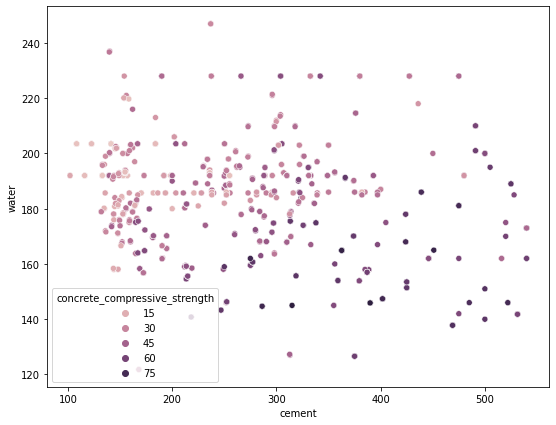

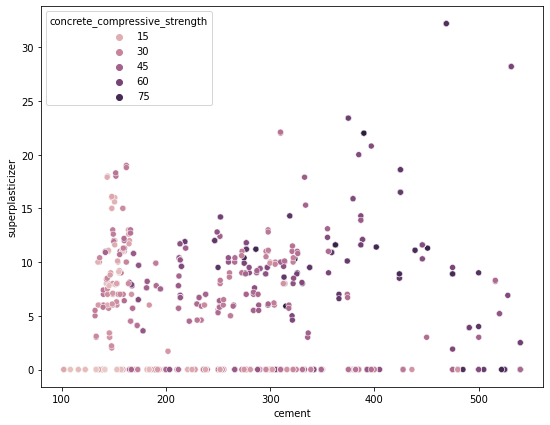

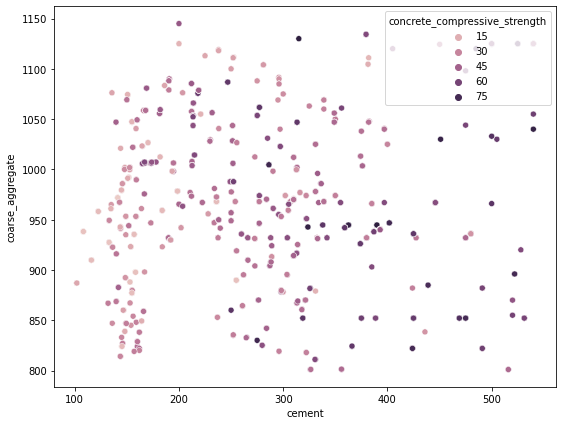

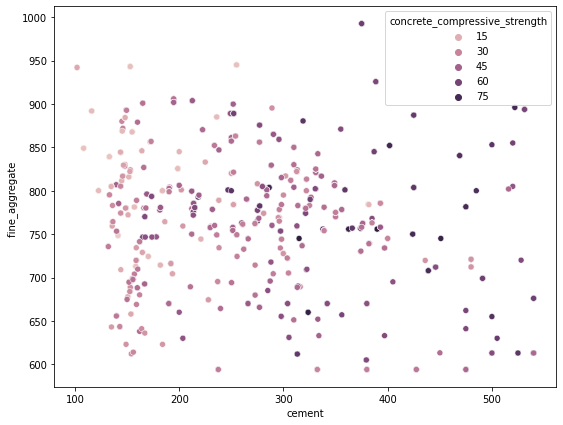

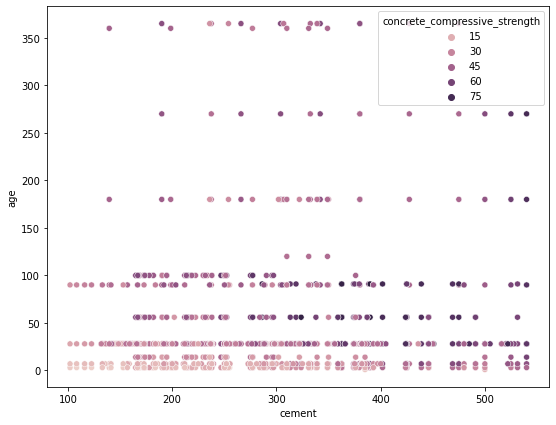

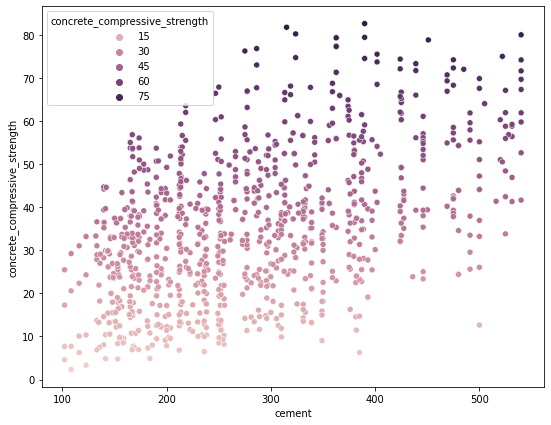

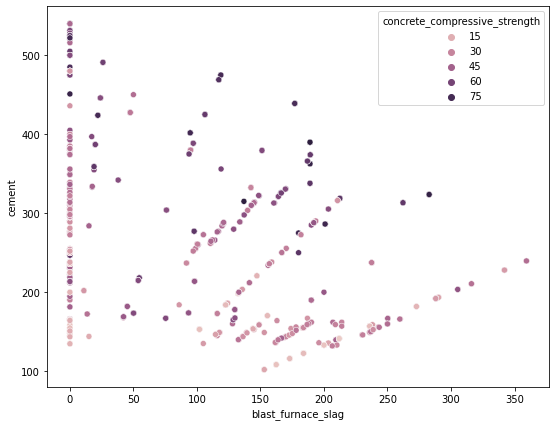

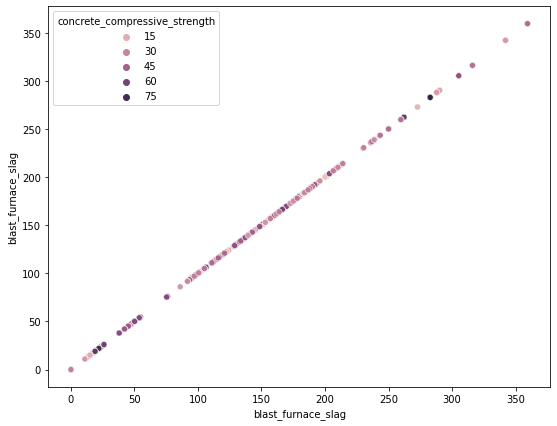

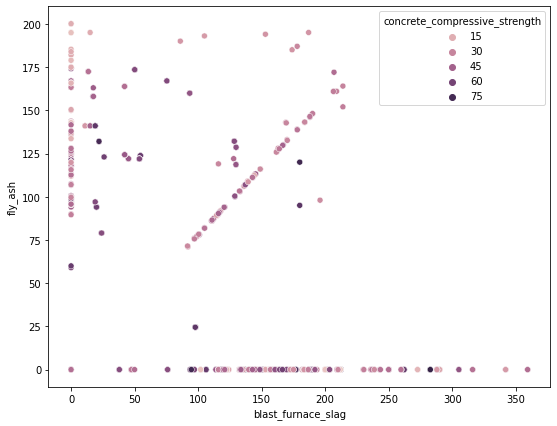

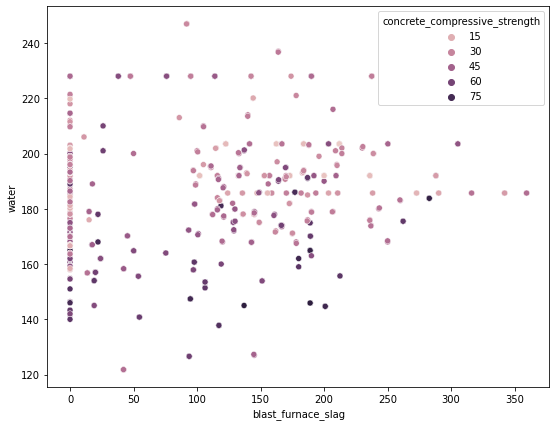

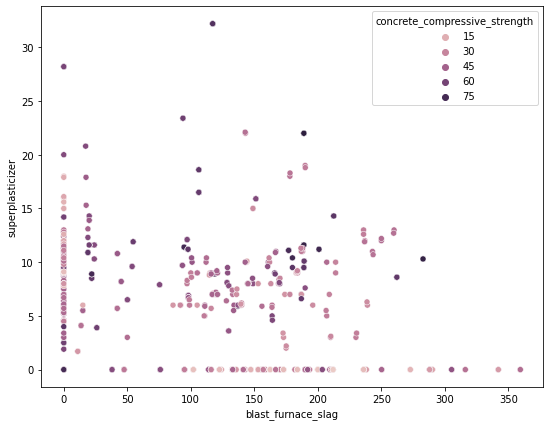

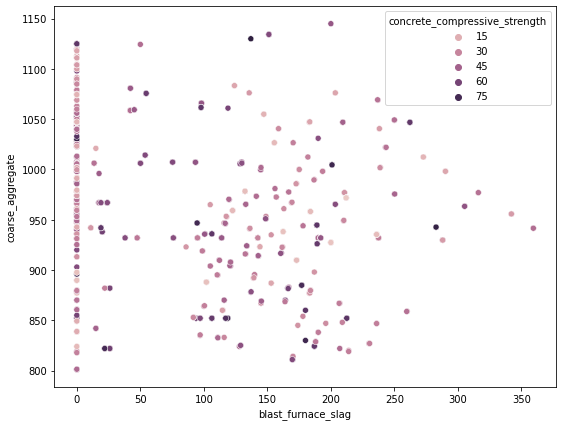

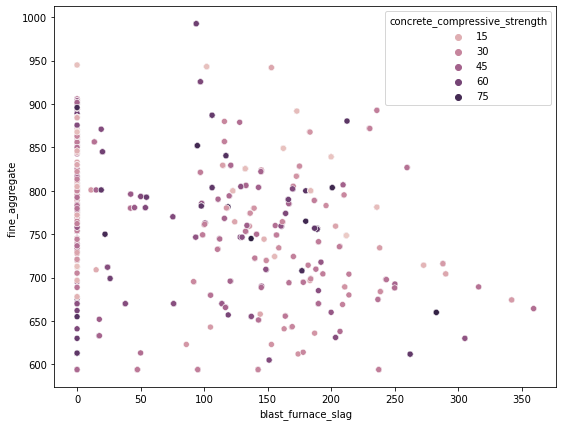

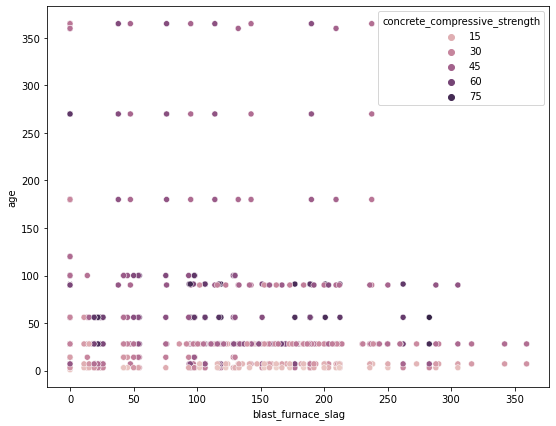

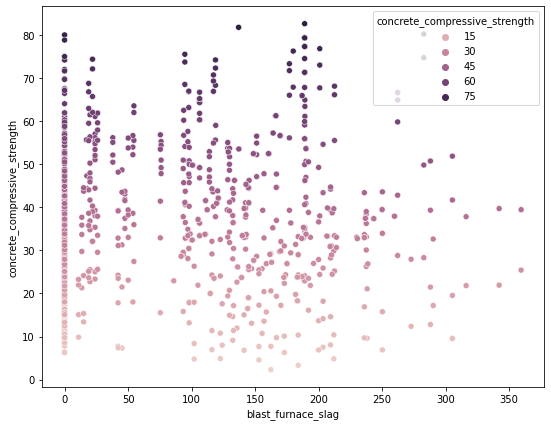

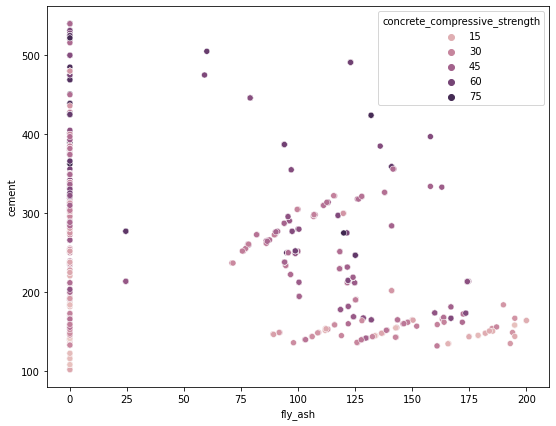

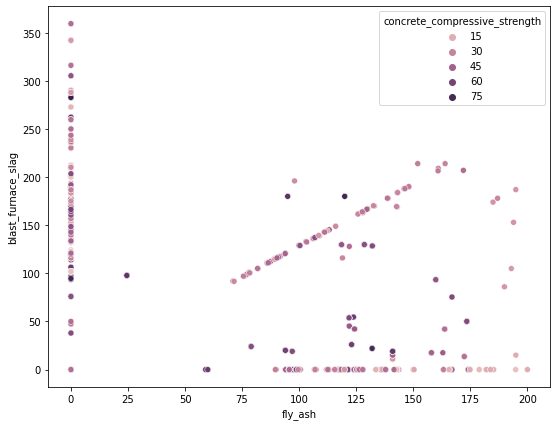

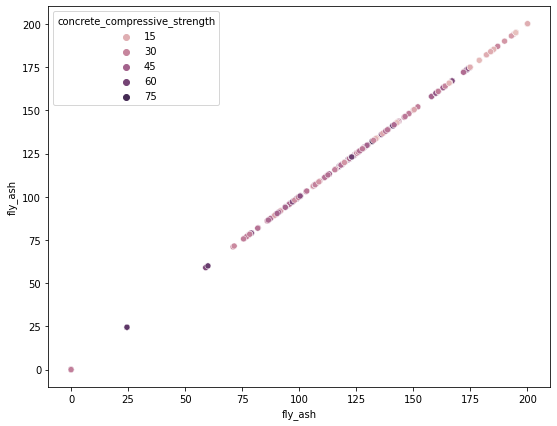

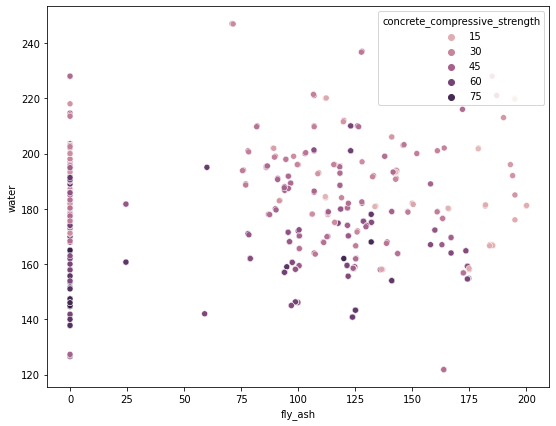

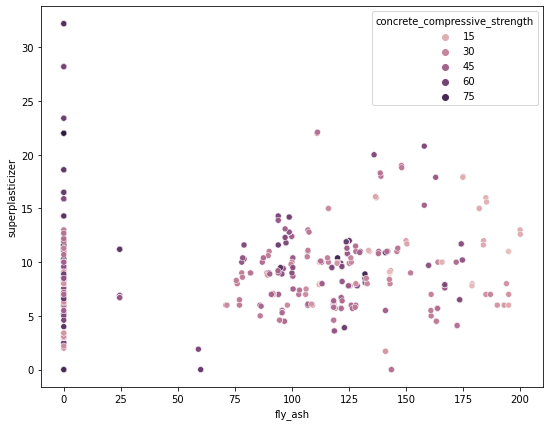

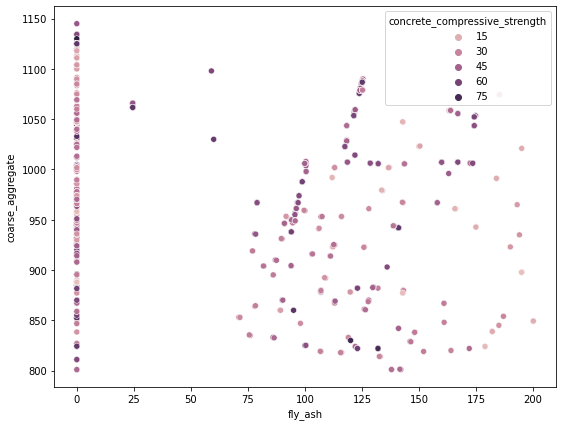

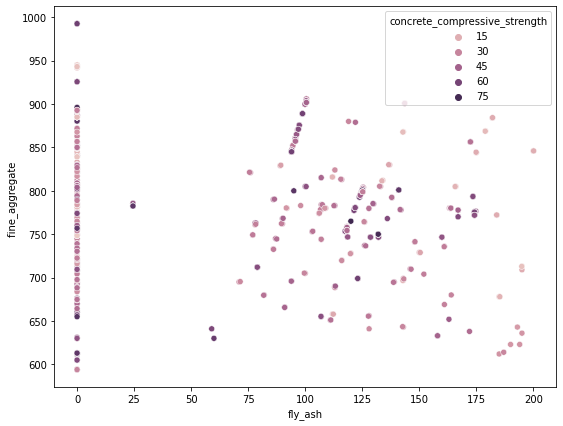

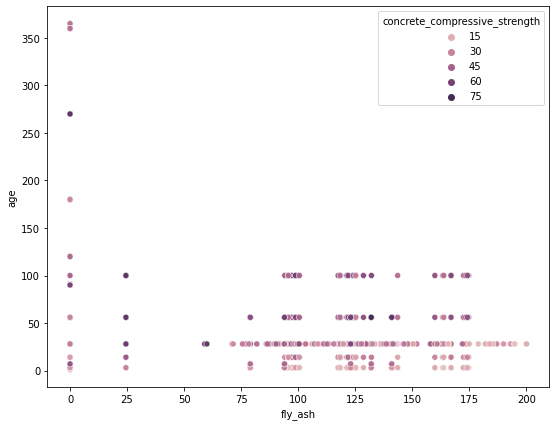

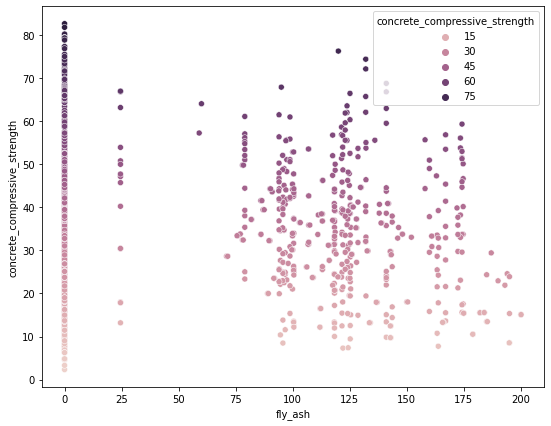

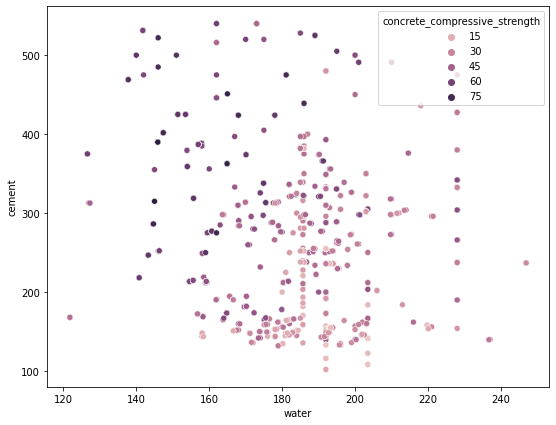

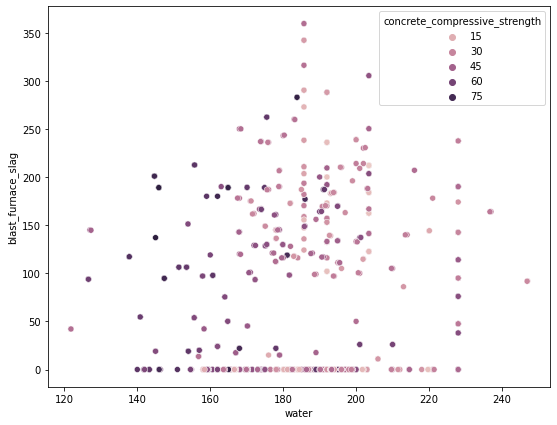

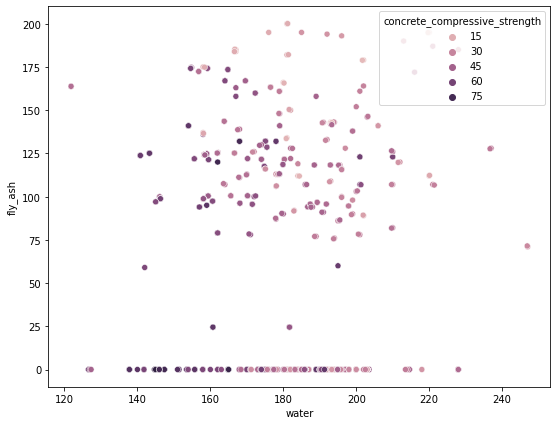

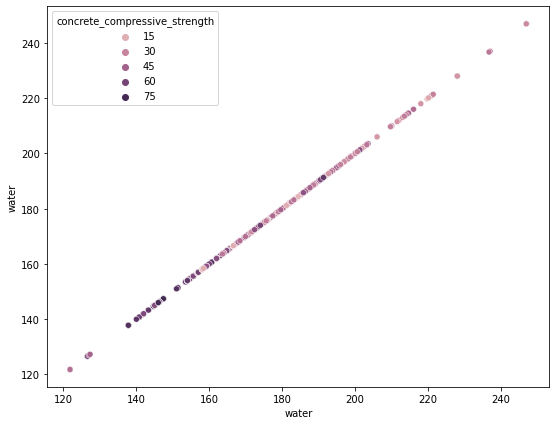

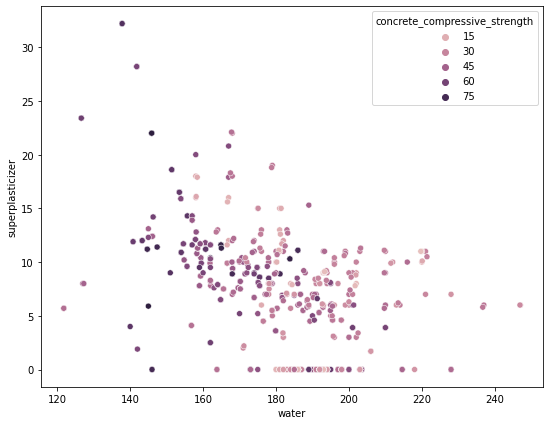

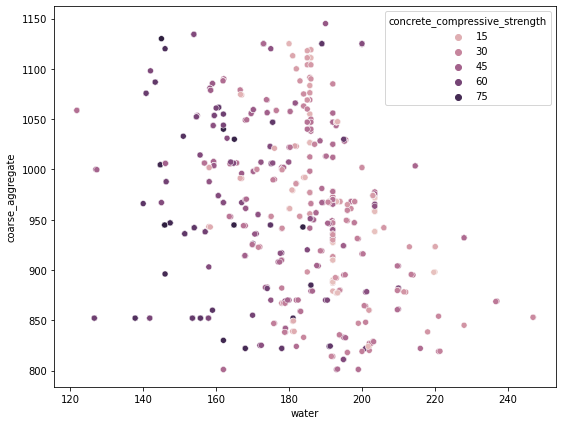

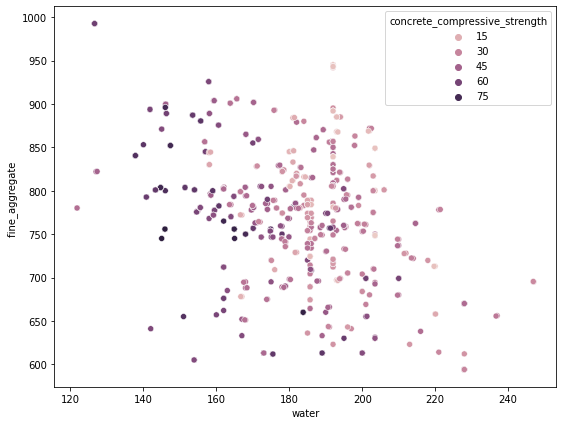

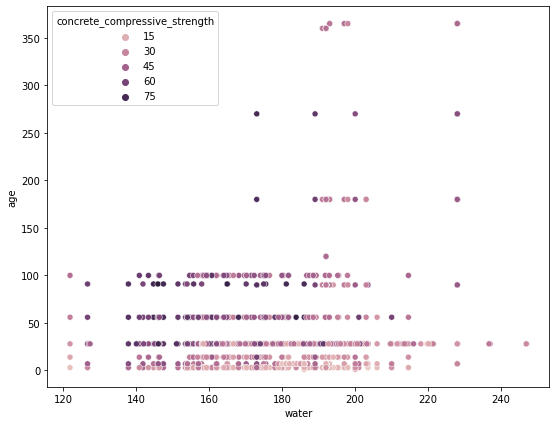

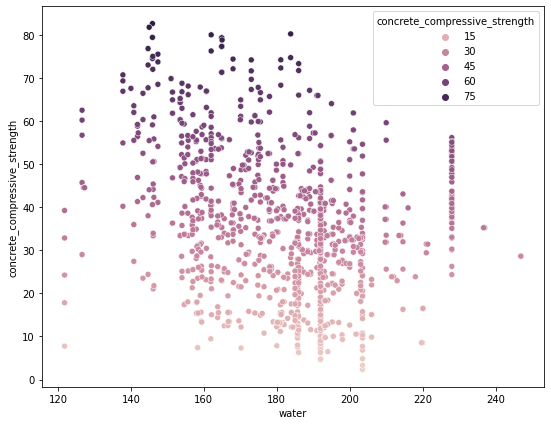

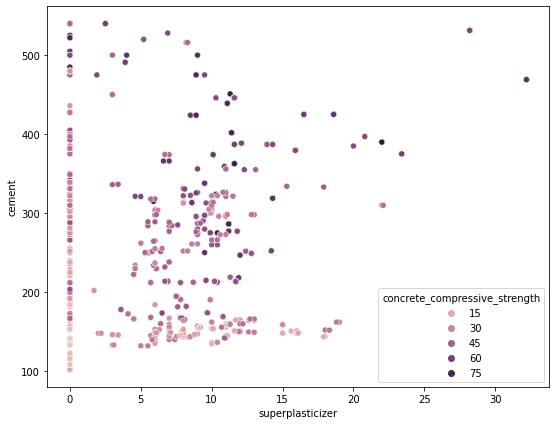

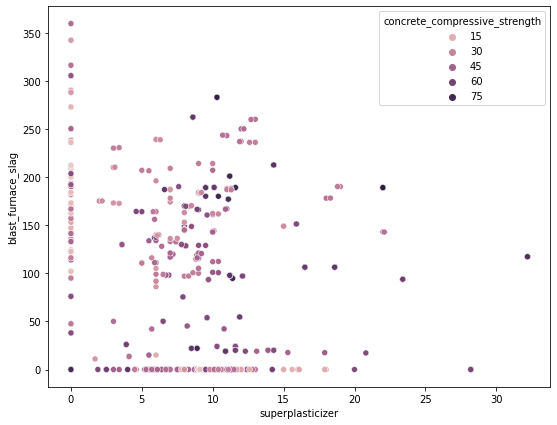

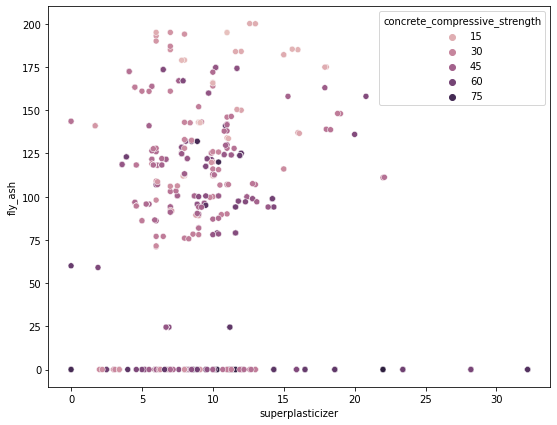

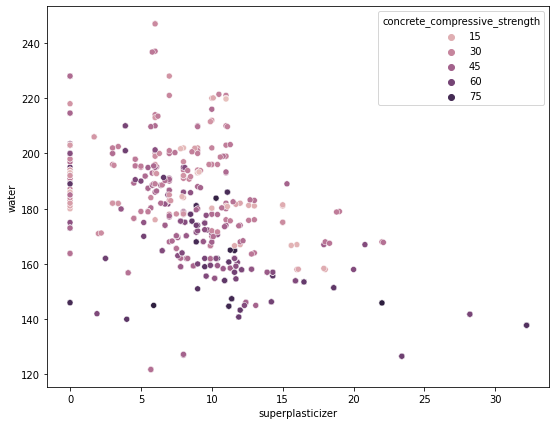

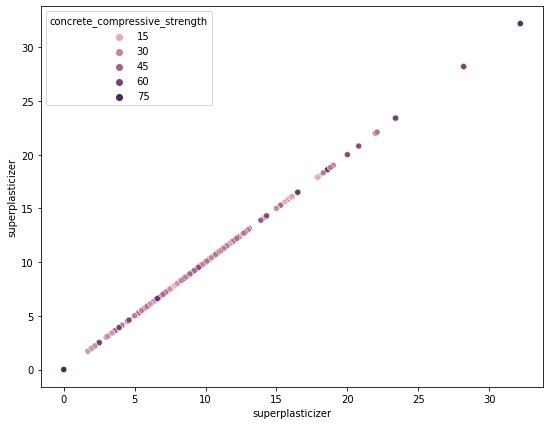

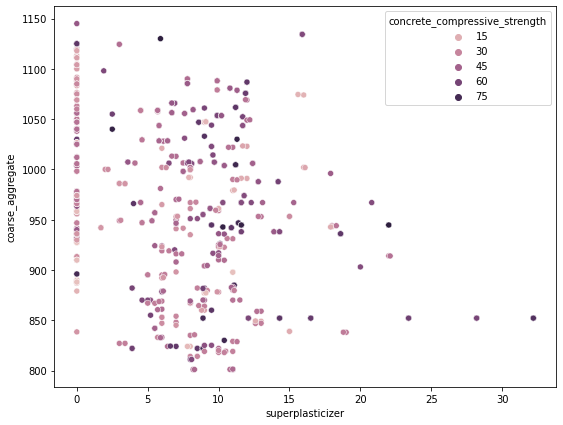

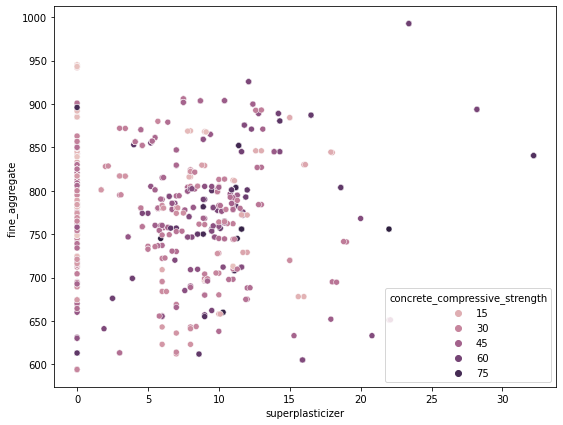

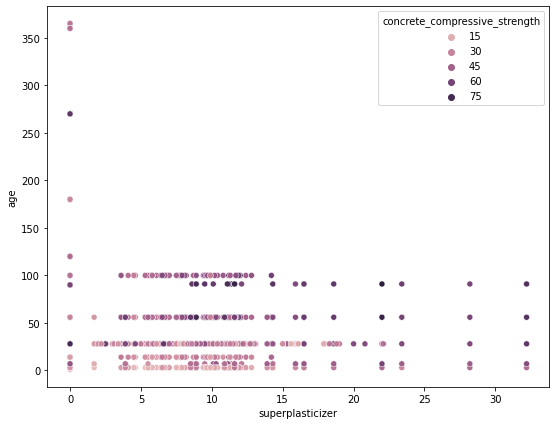

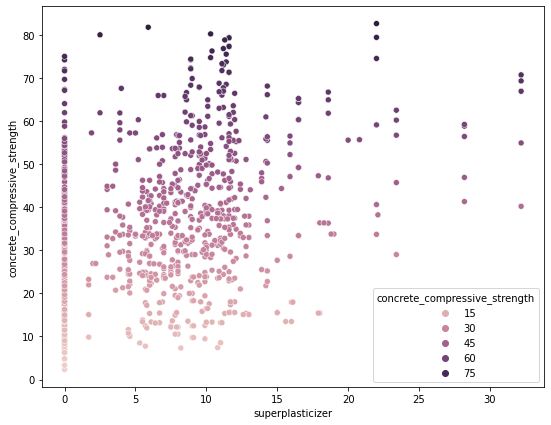

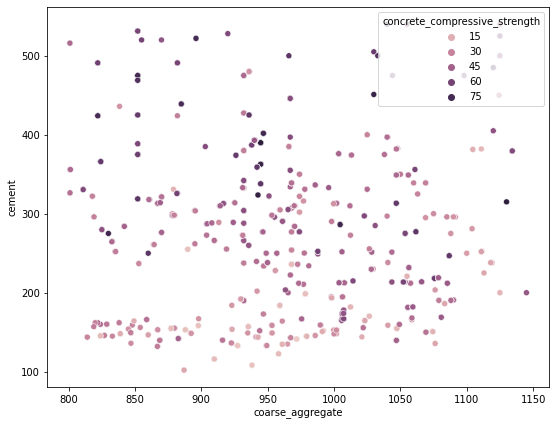

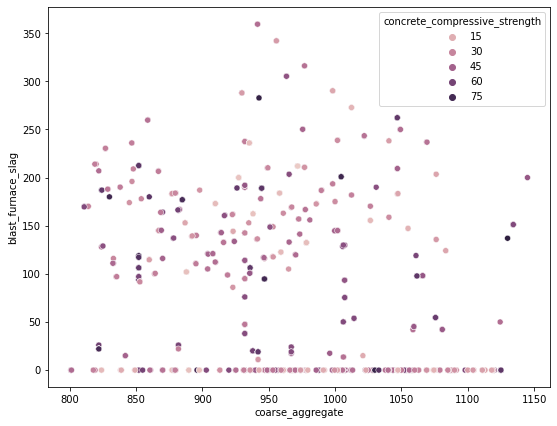

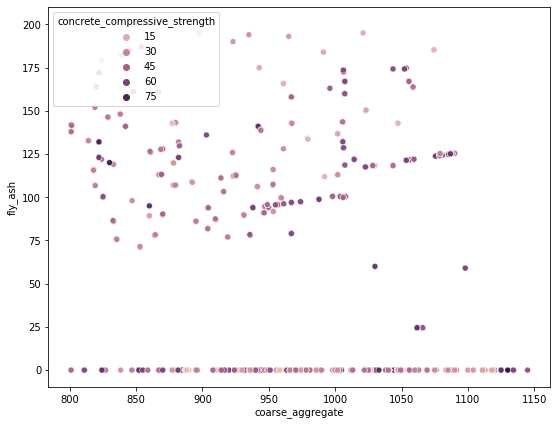

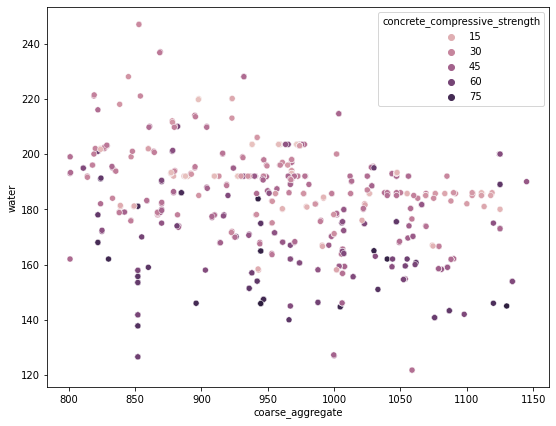

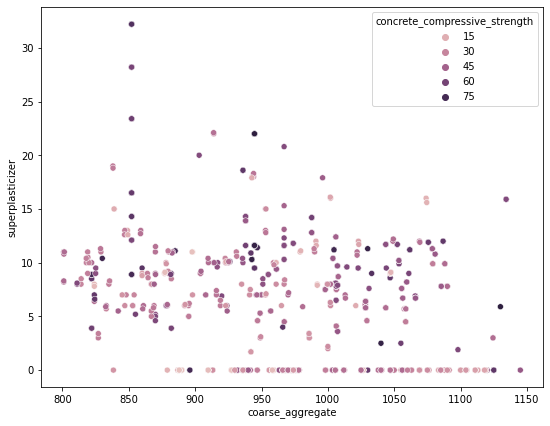

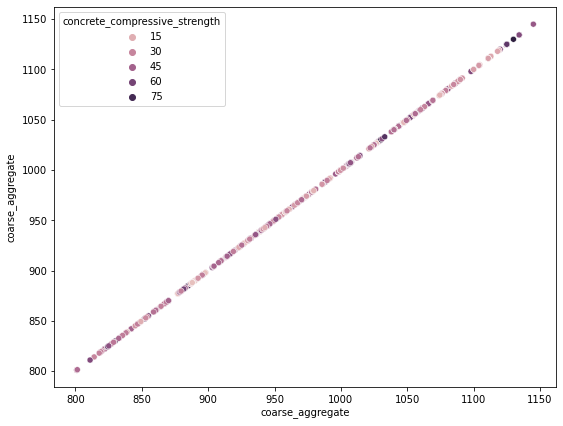

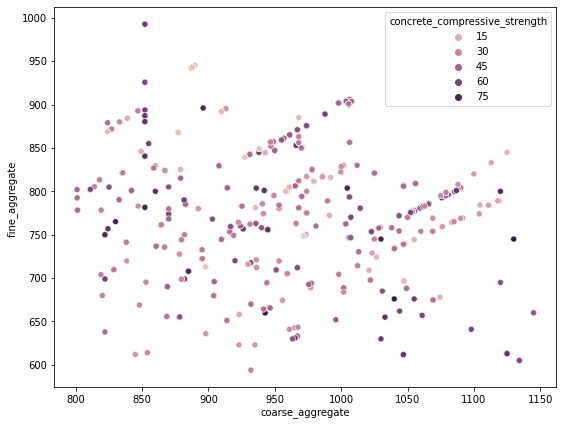

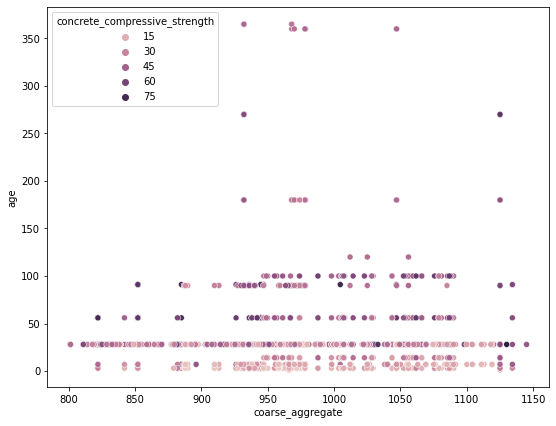

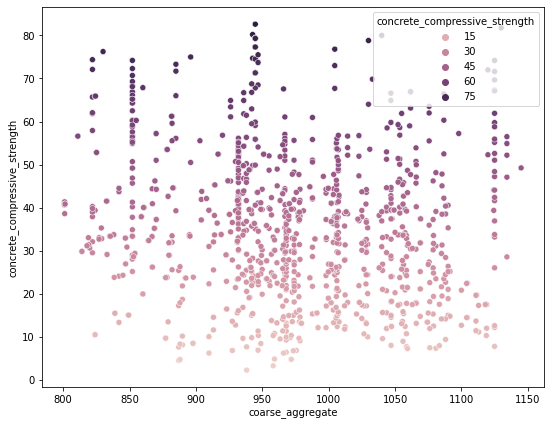

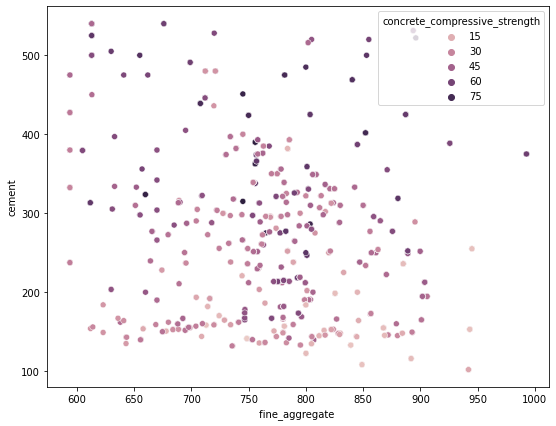

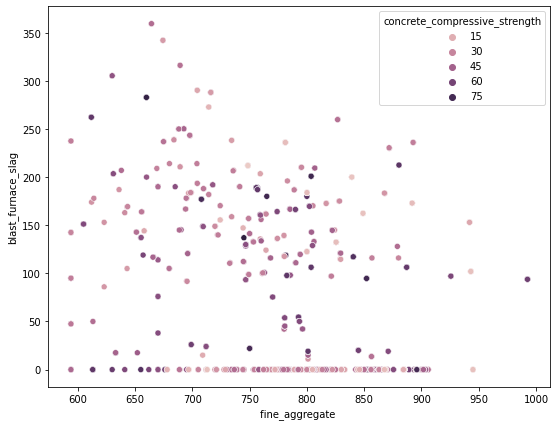

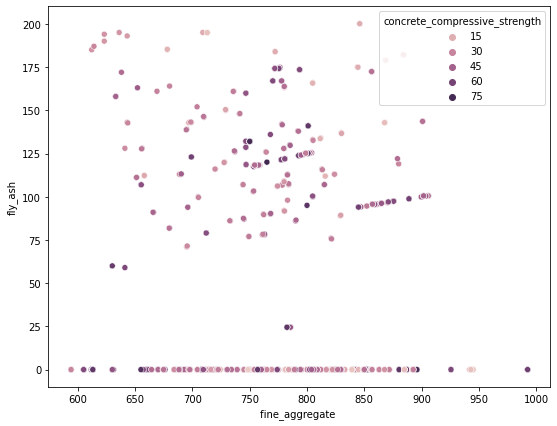

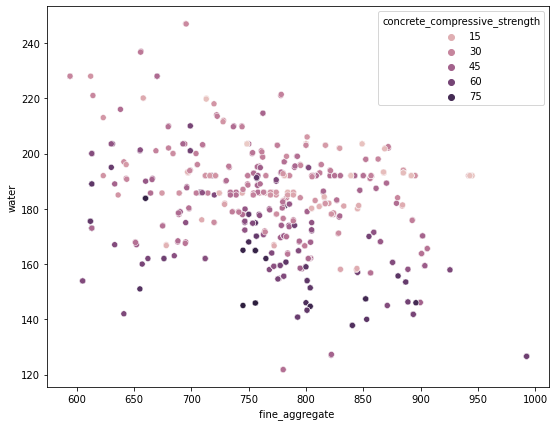

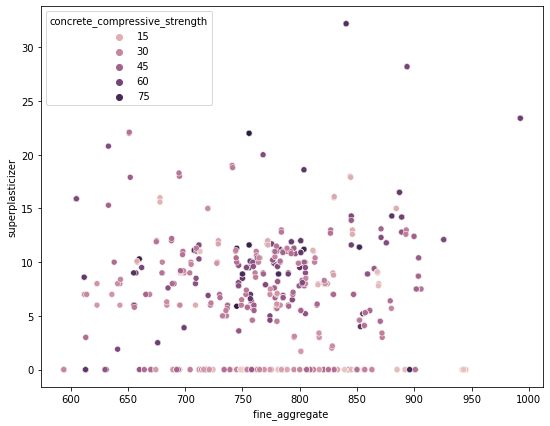

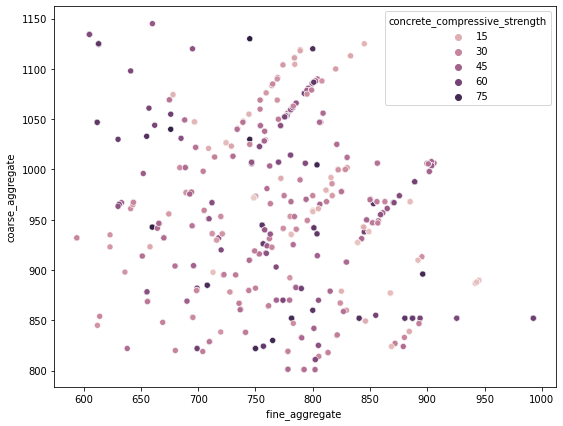

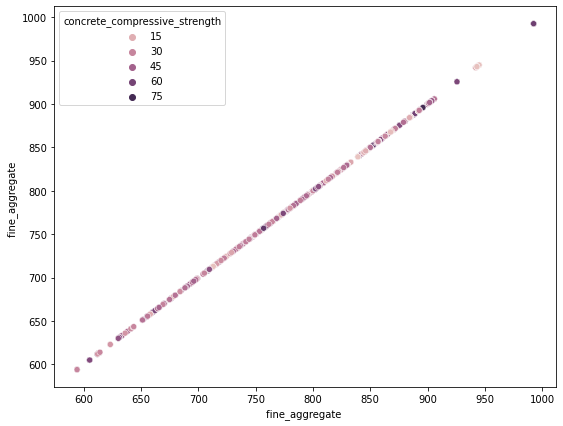

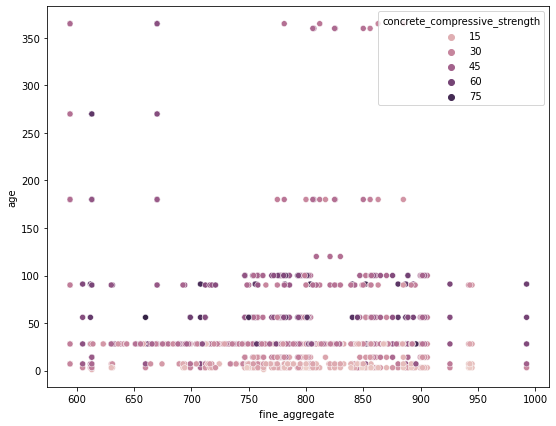

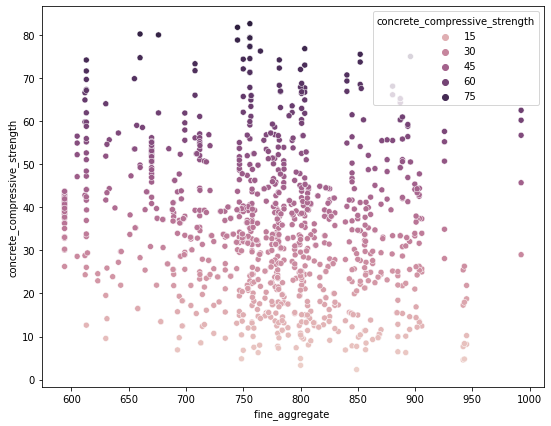

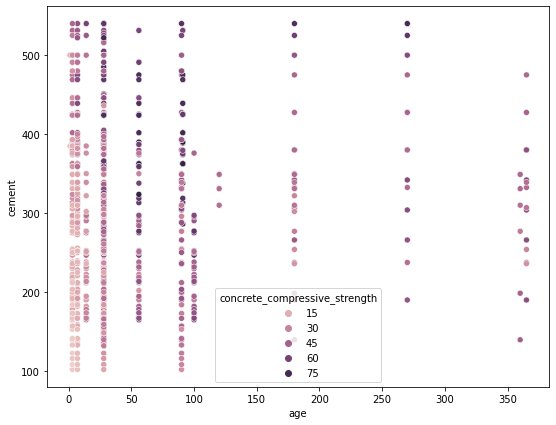

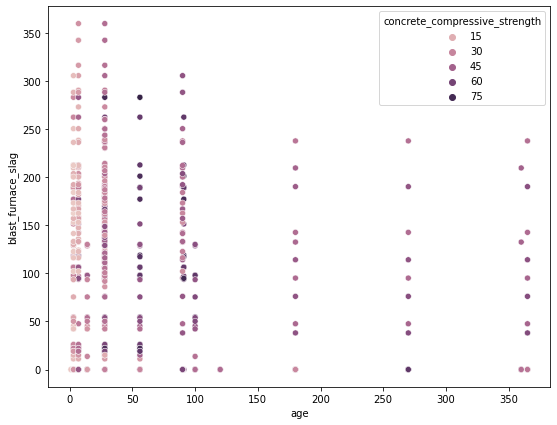

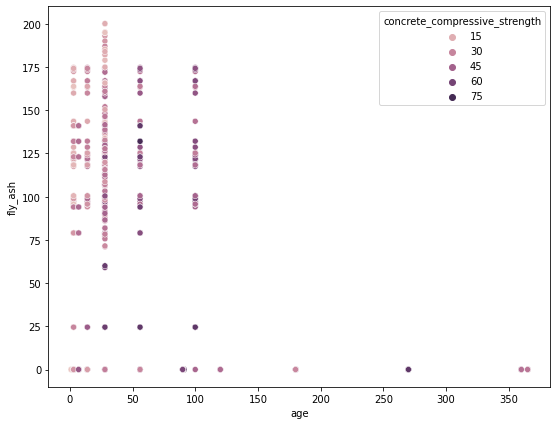

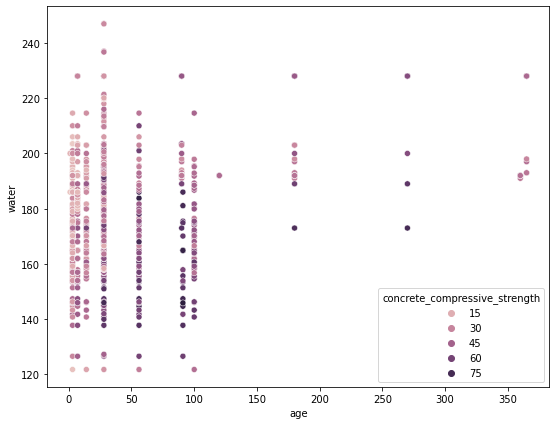

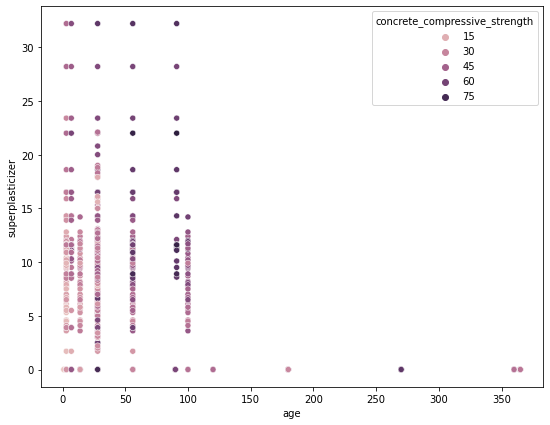

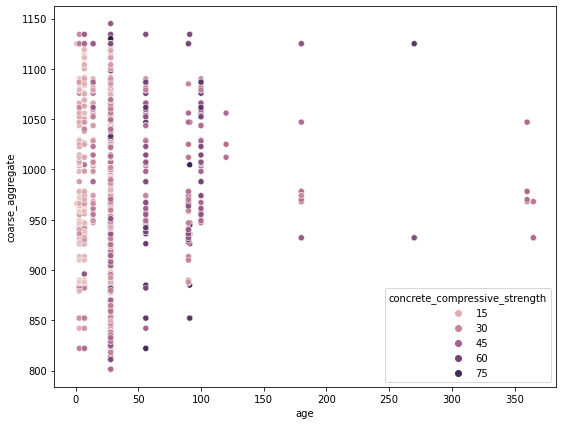

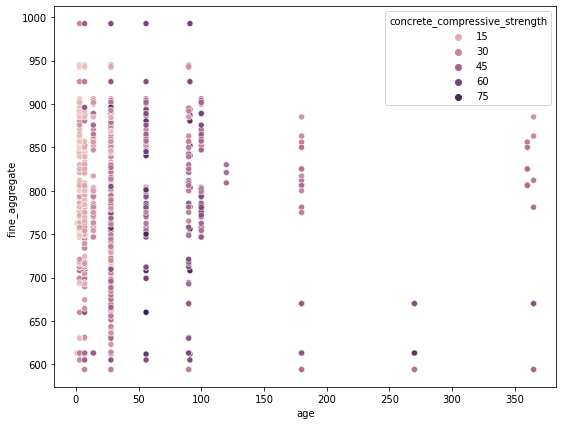

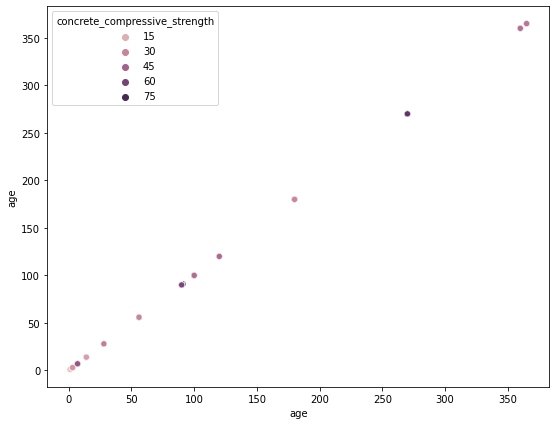

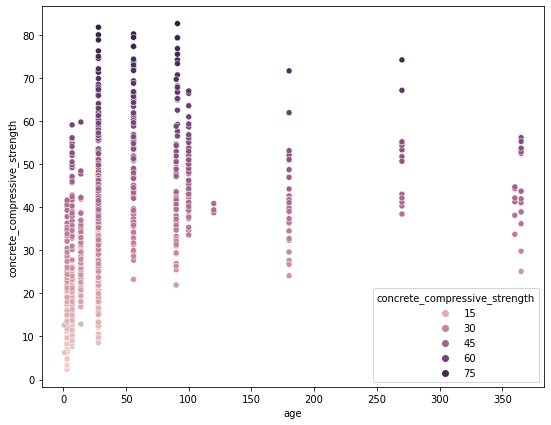

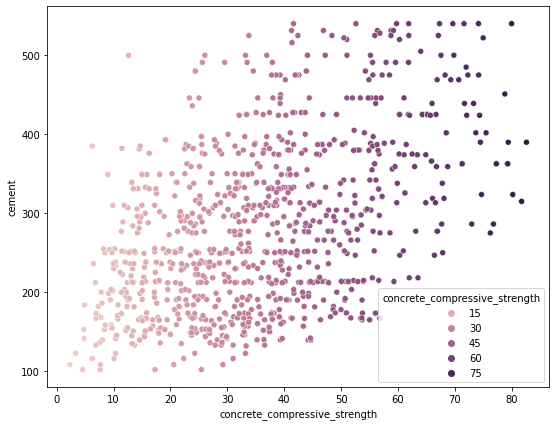

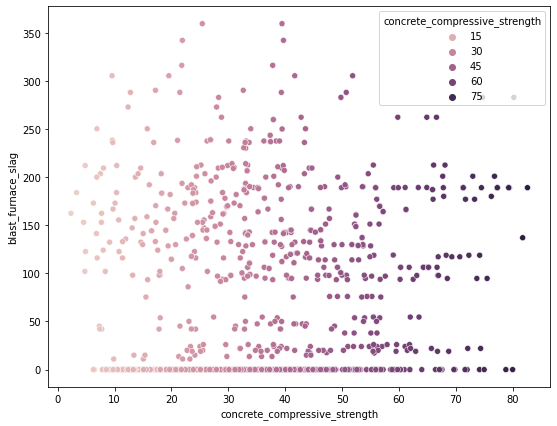

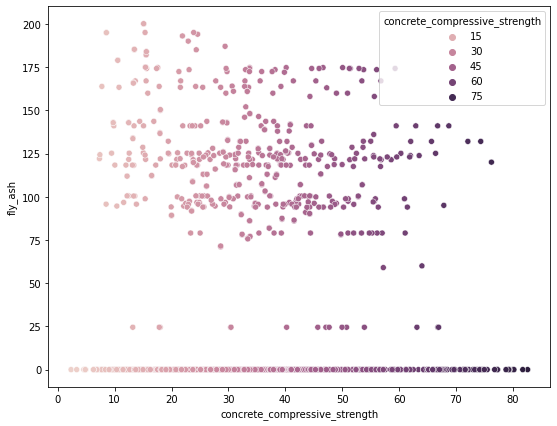

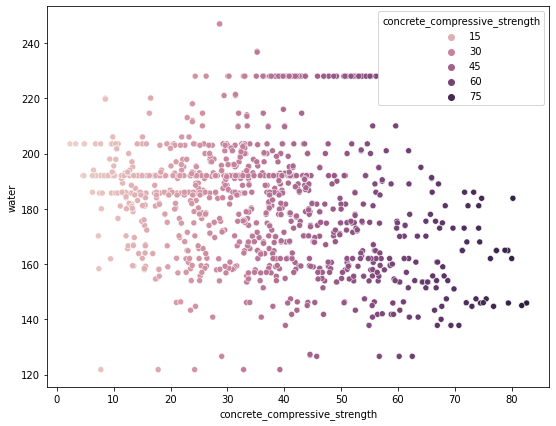

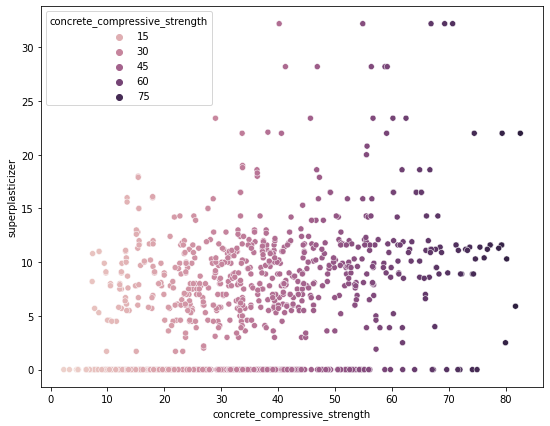

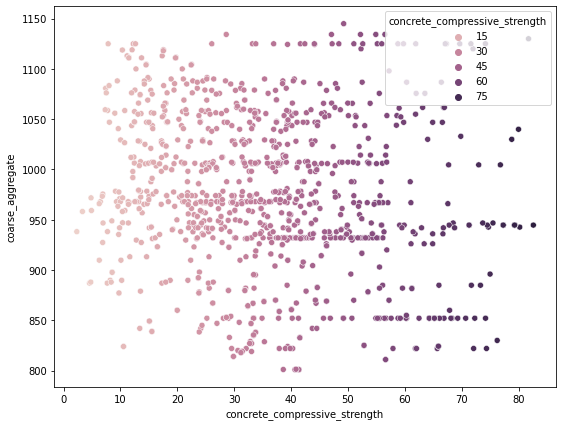

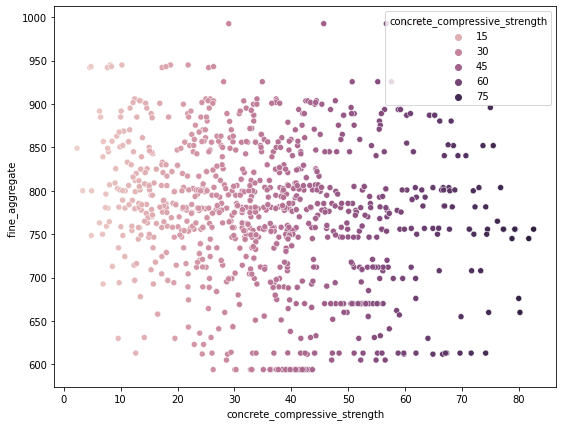

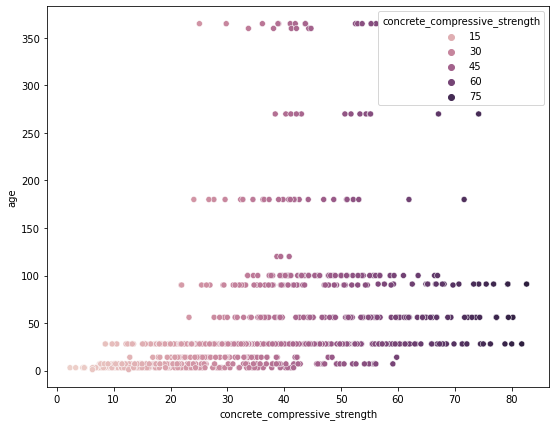

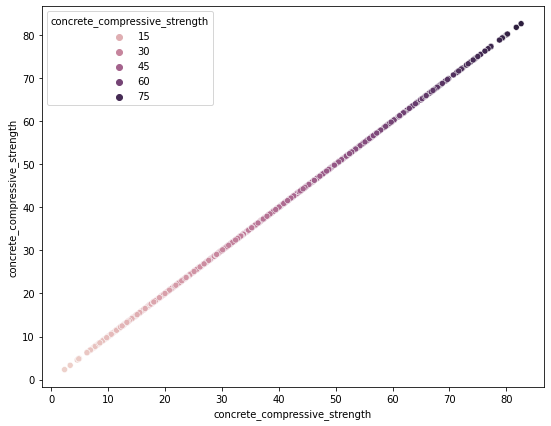

In [8]:
for i in df.columns:
    for j in df.columns:
        plt.figure(figsize=(9,7))
        sns.scatterplot(x=i,y=j,hue="concrete_compressive_strength",data=df)
        plt.show()

### Outlier Analysis

In [9]:
def outlier(data,column):
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title("{} distribution".format(column))

c:\Users\pj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pj\anaconda3\lib\site-packages\

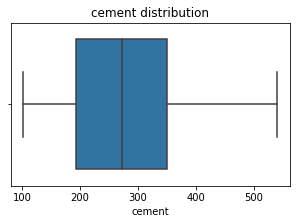

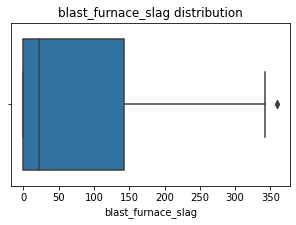

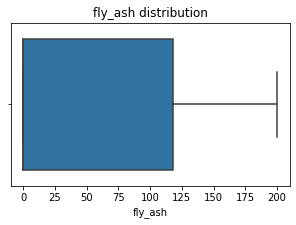

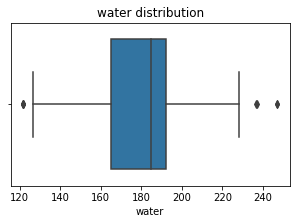

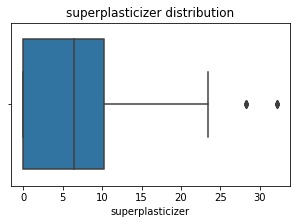

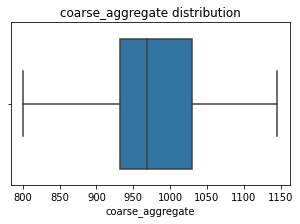

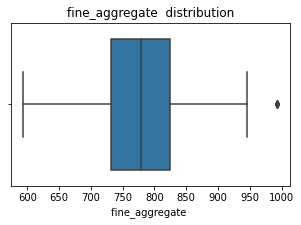

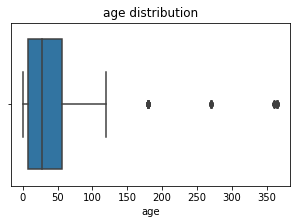

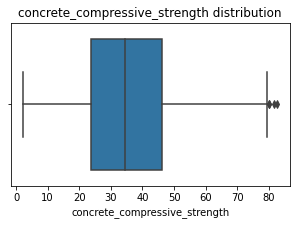

In [10]:
for i in df.columns:
    outlier(df,i)

#### Findind the min and max value for every feature

In [11]:
def end_value_show(data,column):
    print("min value of {} is {} \nmax value of {} is {}".format(column,data[column].min(),column,data[column].max()))

In [12]:
for i in df.columns:
    end_value_show(df,i)

min value of cement is 102.0 
max value of cement is 540.0
min value of blast_furnace_slag is 0.0 
max value of blast_furnace_slag is 359.4
min value of fly_ash is 0.0 
max value of fly_ash is 200.1
min value of water is 121.8 
max value of water is 247.0
min value of superplasticizer is 0.0 
max value of superplasticizer is 32.2
min value of coarse_aggregate is 801.0 
max value of coarse_aggregate is 1145.0
min value of fine_aggregate  is 594.0 
max value of fine_aggregate  is 992.6
min value of age is 1 
max value of age is 365
min value of concrete_compressive_strength is 2.33 
max value of concrete_compressive_strength is 82.6


#### Replacing the Outliers

In [13]:
df=df[df["blast_furnace_slag"]<350]
df=df[(df["water"]<246) & (df["water"]>122)]
df=df[df["superplasticizer"]<25]
df=df[df["age"]<150]

In [17]:
df.to_csv(r"C:\Users\pj\Downloads\Concrete Compressive Strength Prediction\Data\Processed_Data\Analysis_Data", index=False)

In [ ]:
plt.savefig('C:/Users/pj/Downloads/Bangalore House Price Prediction/reports/visualization/No_Bathroom_plot.png')